<a href="https://colab.research.google.com/github/zahra-zarrabi/Titanic/blob/master/MachineLearning_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#process
train_data = train_data.replace(['female','male'],[0, 1])
train_data = train_data.replace(['S','C','Q'],[0, 1, 2])
train_data=train_data.fillna(0)


In [ ]:
X_train = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train = train_data[['Survived']]
X_train = np.array(X_train)
Y_train = np.array(Y_train) 


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='relu'),
                                    tf.keras.layers.Dense(7,activation='sigmoid'),
                                    # tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
output=model.fit(X_train,Y_train,epochs=600)
model.save('/content/model.h5')

Epoch 1/600
28/28 [==============================] - 1s 2ms/step - loss: 0.7548 - accuracy: 0.6162
Epoch 2/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6162
Epoch 3/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6162
Epoch 4/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6162
Epoch 5/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6162
Epoch 6/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6162
Epoch 7/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6162
Epoch 8/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6162
Epoch 9/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6162
Epoch 10/600
28/28 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6162
Epoch 11/

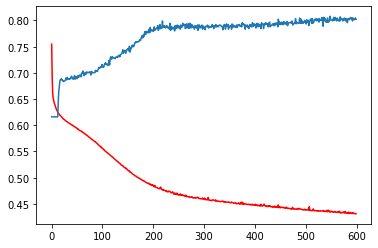

In [ ]:
plt.plot(output.history['loss'],color='red')
plt.plot(output.history['accuracy'])

In [ ]:
test_data = pd.read_csv('/content/test.csv')
Survived_data = pd.read_csv('/content/gender_submission.csv')
# Survived_data.head()
#process
test_data = test_data.replace(['female','male'],[0, 1])
test_data = test_data.replace(['S','C','Q'],[0, 1, 2])
test_data=test_data.fillna(0)

X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_test = Survived_data[['Survived']]
X_test = np.array(X_test)
Y_test = np.array(Y_test) 

from keras import layers
layer = layers.Normalization()
layer.adapt(X_test)
X_test = layer(X_test).numpy()


In [ ]:
acc=model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9617


In [ ]:
jack=np.array([3,0,30,2,1,72.0,1])
jack=jack.reshape(1,7)
y_pred=model.predict(jack)
prid=np.argmax(y_pred)
print('predict :',prid)

predict : 1


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
l_2=[]
for k in range(5):
  knc=KNeighborsClassifier(n_neighbors=5)
  knc.fit(X_train,Y_train)
  pred=knc.predict(X_test)
  test_score=knc.score(X_test,Y_test)
  l_2.append(test_score)
print(np.max(l_2))

0.6363636363636364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Data

In [ ]:
#adaline 
from numpy.linalg import inv
class AdalineClassifier:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        self.w=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
    def predict(self,x_test):
        y_pred=np.matmul(x_test,self.w)
        y_pred=np.round(y_pred)
        return y_pred
    def evaluate_mae(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.w)
        y_pred[y_pred>0.5]=1
        y_pred[y_pred <= 0.5]=0
        evaluatation=(y_pred==y_test).sum()/len(y_test)
        return evaluatation 

# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)
model=AdalineClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
accuracy = model.evaluate_mae(X_test, Y_test)
print('accuracy :',accuracy)

accuracy : 0.8110047846889952


In [ ]:
#perceptron
def fit(X_train,Y_train):
    lr=0.001
    epochs=500
    N=X_train.shape[0]
    
    W = np.random.rand(7,1)
    b = np.random.rand(1, 1)


    for i in range(epochs):
        errors = []

        for n in range(N):

            y_pred = np.matmul(X_train[n:n+1],W)+b
            e = np.subtract(Y_train[n], y_pred)

            Y_pred = np.matmul(X_train, W) + b
            error = np.mean(np.abs(Y_train - Y_pred))
            errors.append(error)

            #update
            W = W + lr*X_train[n:n+1,:].T* e
            b = b + lr * e

    np.save('Weight.npy',W)
    np.save('baias.npy',b)
 
    return W,b

def predict(X_test):
    w=np.load('Weight.npy')
    b=np.load('baias.npy')
    y_pred=np.matmul(X_test,w)+b
    return y_pred

def evaluate(x_test,y_test):
    w=np.load('Weight.npy')
    b=np.load('baias.npy')
    y_pred = np.matmul(X_test, w) + b   
    y_pred[y_pred>0.5]=1
    y_pred[y_pred <= 0.5]=0 
    evaluatation=(y_pred == y_test).sum()/len(y_test)
    return evaluatation

from keras import layers
layer = layers.Normalization()
layer.adapt(X_train)
X_train = layer(X_train).numpy()
m,b = fit(X_train,Y_train)
y_pred=predict(X_test)
accuracy = evaluate(X_test, Y_test)
print('accuracy', accuracy)


accuracy 0.9784688995215312
